## Support Vector Machines

## Import library packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

## Understand data :-

In [2]:
df = pd.read_csv("heart.csv")

d = pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Identification of variables and data types:-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Missing Value :-

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

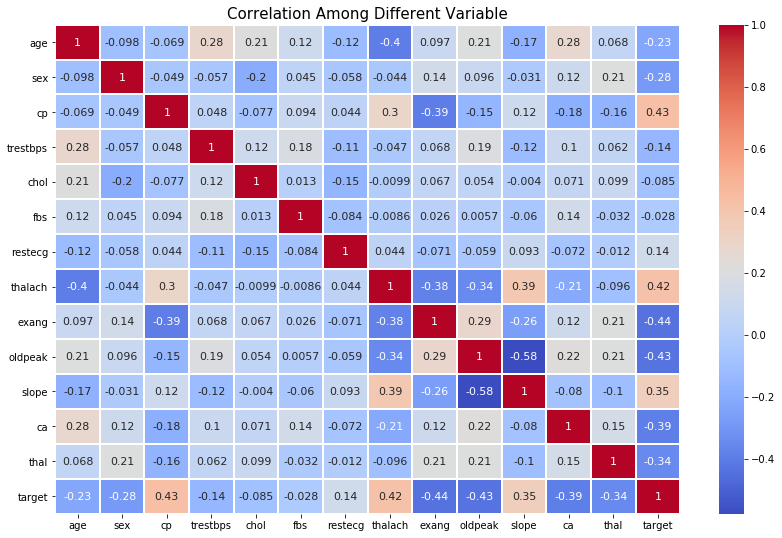

In [9]:
# Prepare the data for correlation

corr=df.corr()

# Relation between different variable
fig,ax=plt.subplots(figsize=(14,9))
sns.heatmap(corr,annot=True,cmap = 'coolwarm',linewidth = 1,annot_kws={"size": 11})
plt.title("Correlation Among Different Variable",size=15);

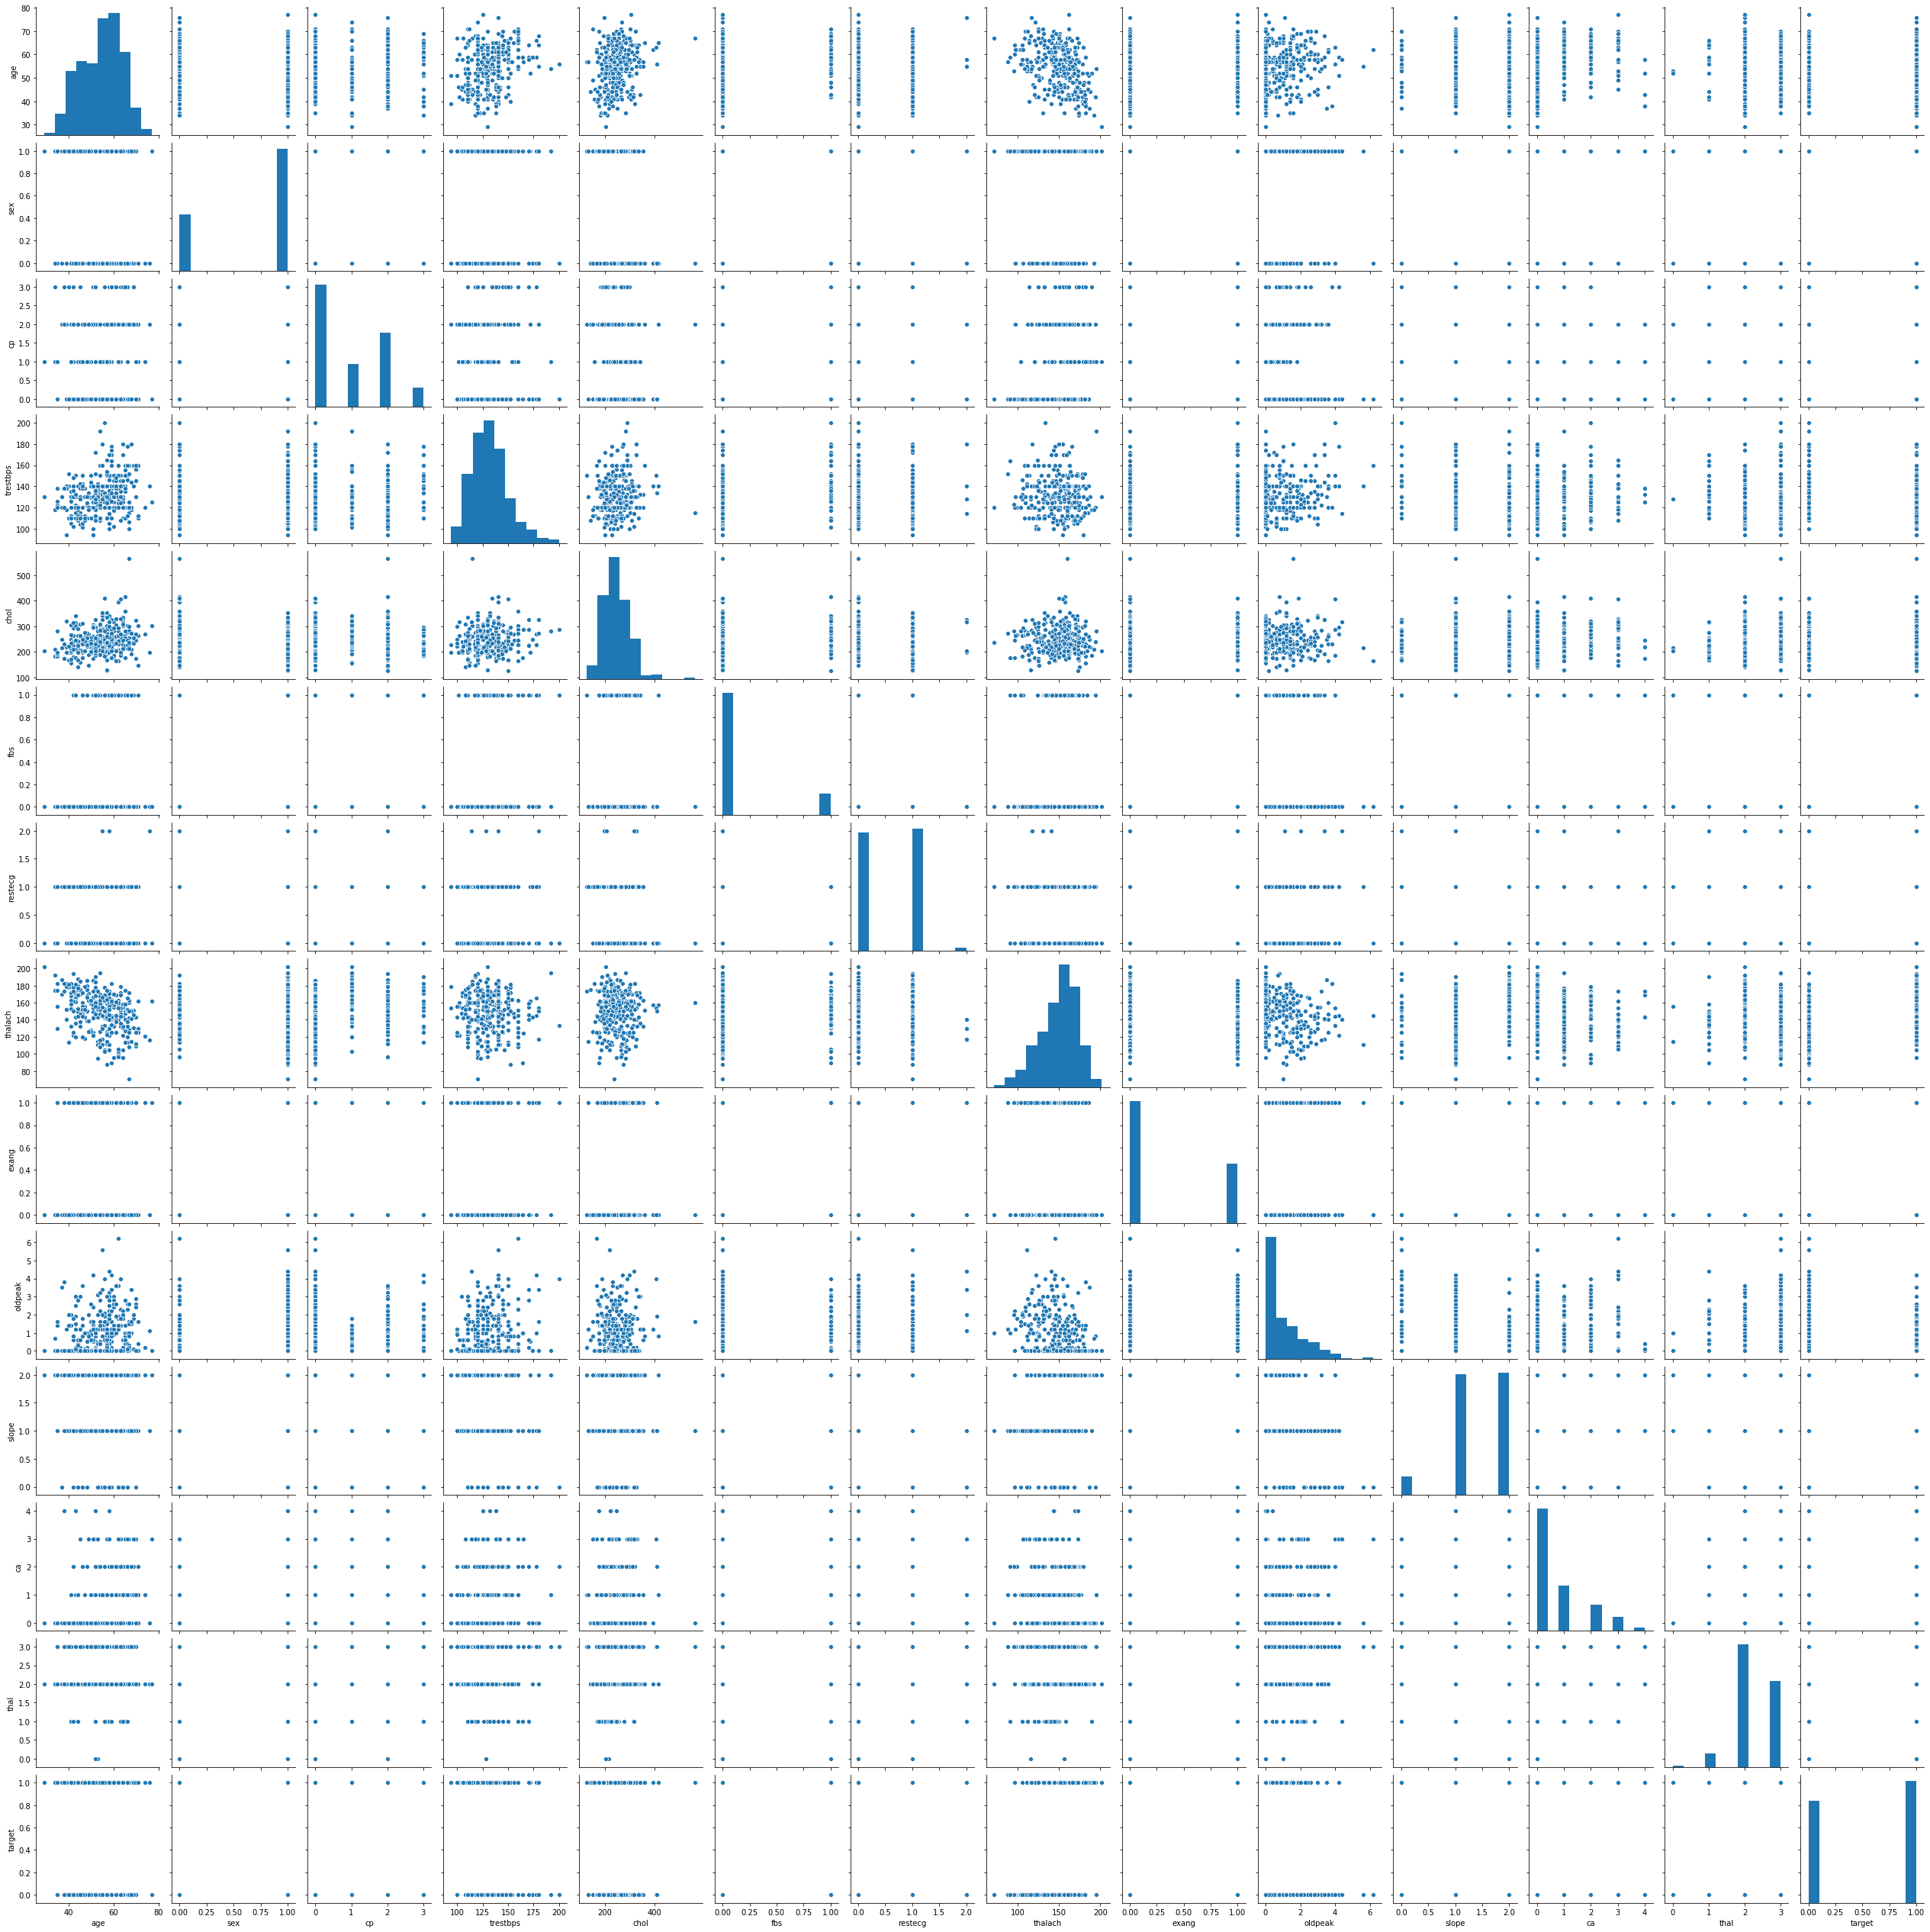

In [10]:
sns.pairplot(df)
plt.show()

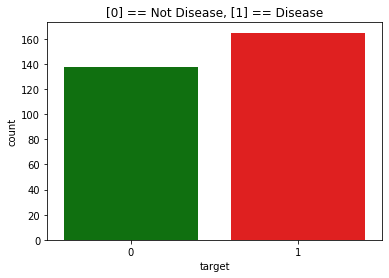

In [11]:
sns.countplot(df.target, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");


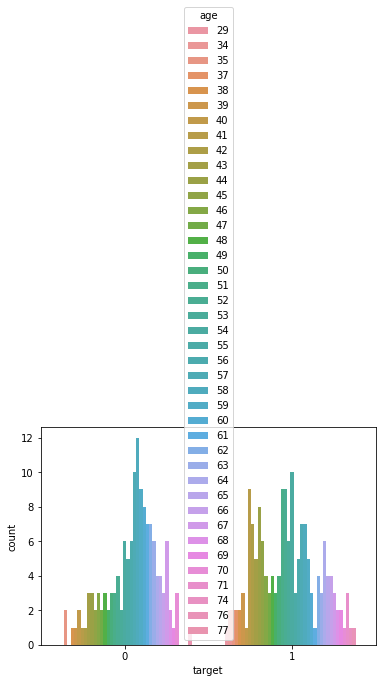

------------------------------------------


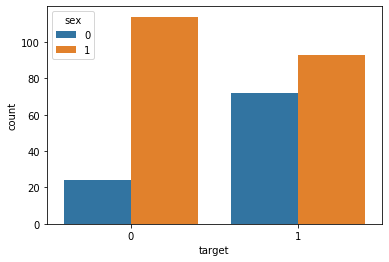

------------------------------------------


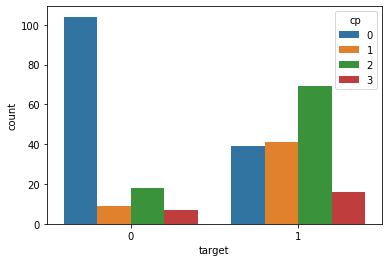

------------------------------------------


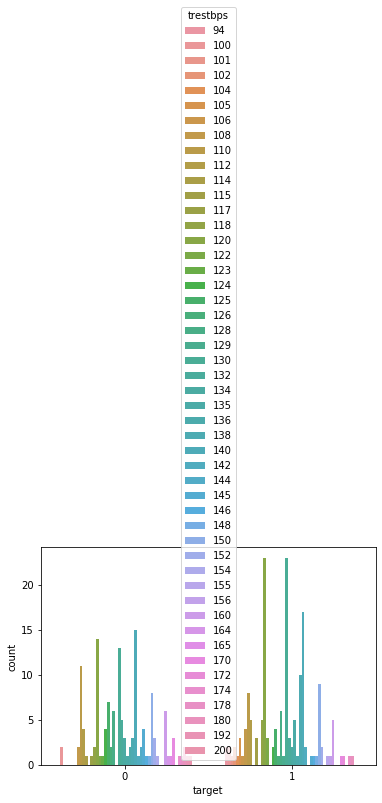

------------------------------------------


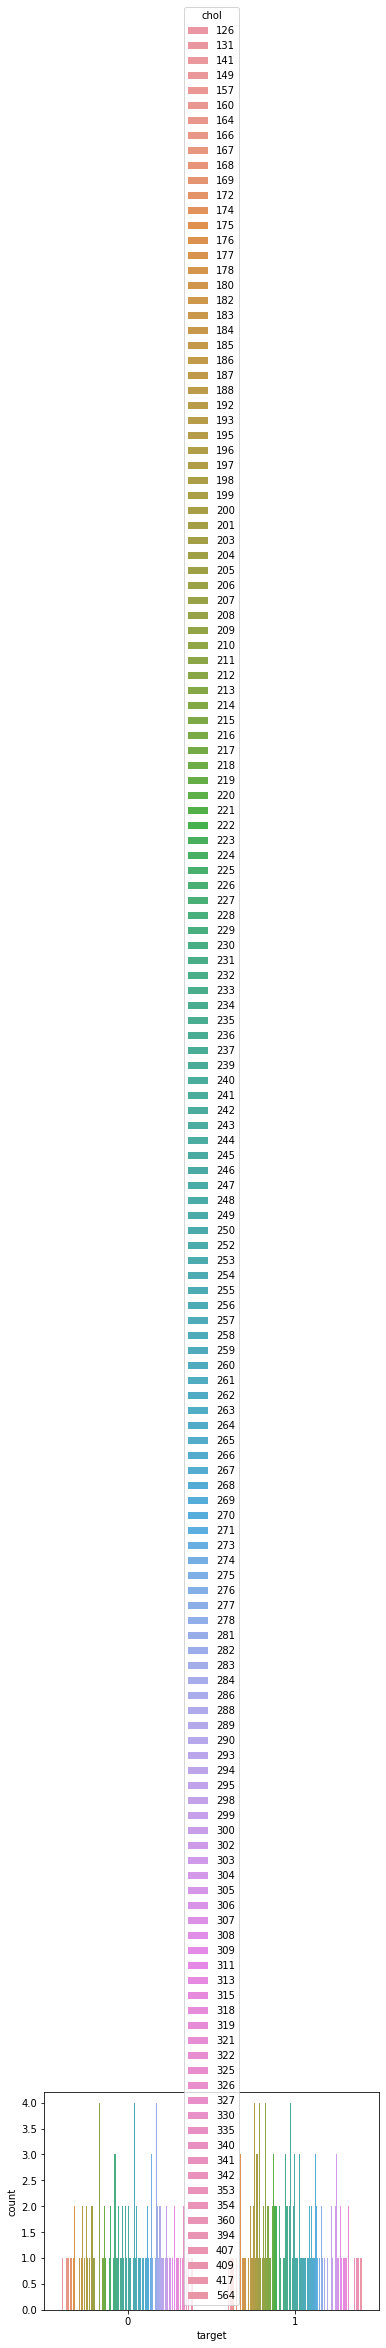

------------------------------------------


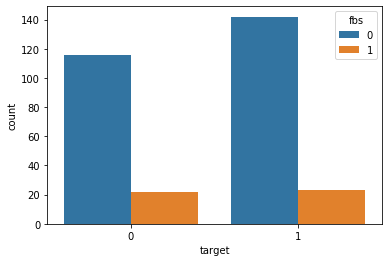

------------------------------------------


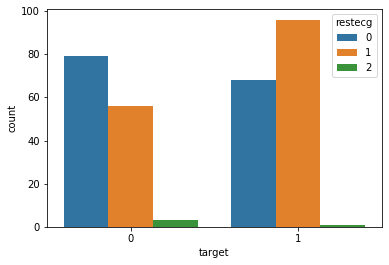

------------------------------------------


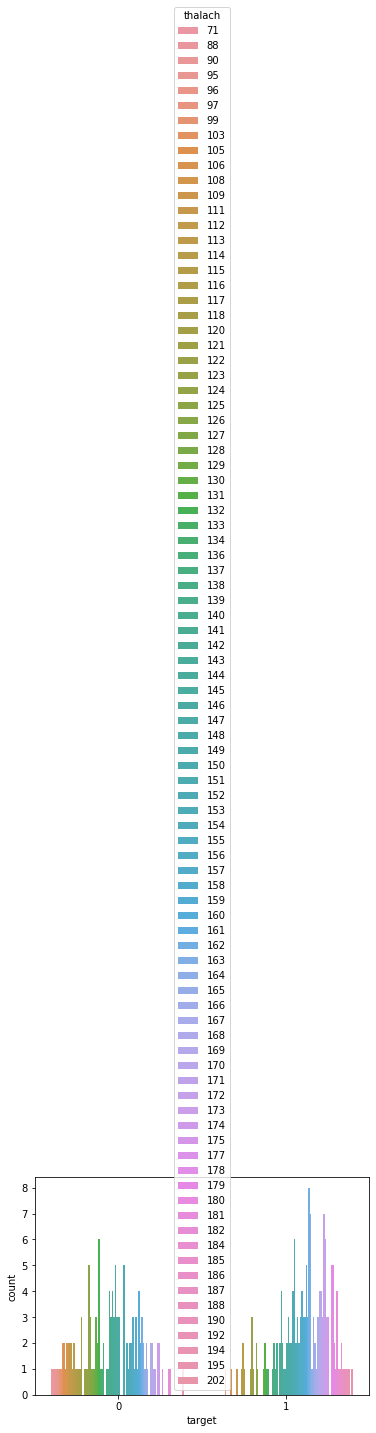

------------------------------------------


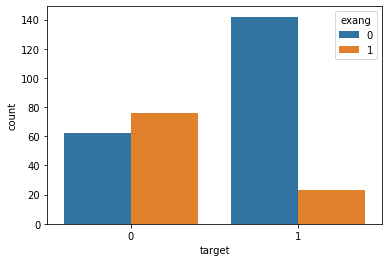

------------------------------------------


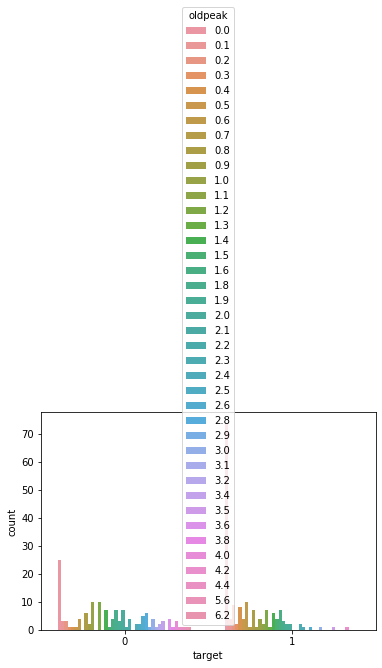

------------------------------------------


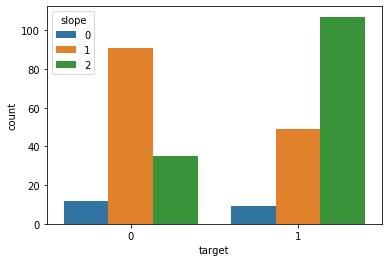

------------------------------------------


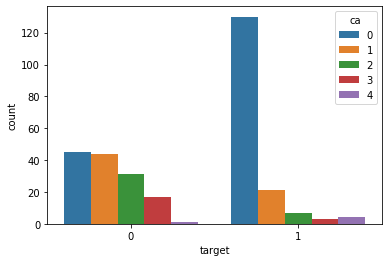

------------------------------------------


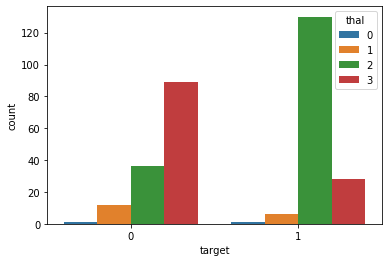

------------------------------------------


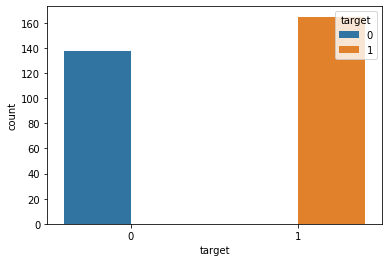

------------------------------------------


In [12]:
for col in df:
    plt.figure()
    sns.countplot(data=df,x="target", hue=col)
    plt.show()
    print("------------------------------------------")

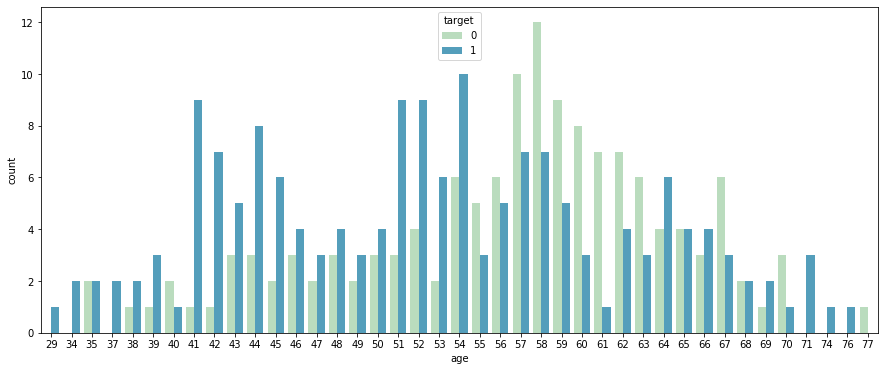

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

## Model building :-

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]   
 


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


## SVM :-

In [16]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.59      0.52        32
           1       0.74      0.63      0.68        59

    accuracy                           0.62        91
   macro avg       0.60      0.61      0.60        91
weighted avg       0.64      0.62      0.62        91



## Simple Linear SVM :-

In [17]:
lsv = LinearSVC(random_state=1)

lsv.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [18]:

y_pred = lsv.predict(X_test)



In [19]:
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.46      1.00      0.63        41
           1       1.00      0.04      0.08        50

    accuracy                           0.47        91
   macro avg       0.73      0.52      0.35        91
weighted avg       0.76      0.47      0.33        91



## Soft margin :-

In [20]:
lsv2 = LinearSVC(C=0.5,random_state=1)

lsv2.fit(X_train,y_train)


LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [21]:
y_pred = lsv.predict(X_test)



In [22]:
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.46      1.00      0.63        41
           1       1.00      0.04      0.08        50

    accuracy                           0.47        91
   macro avg       0.73      0.52      0.35        91
weighted avg       0.76      0.47      0.33        91



<p>The model overfits quite substantially,SVM requires all the features to vary on a similar scale. We will need to re-scale our data that all the features are approximately on the same scale.</p>

## scaler :-

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
clf = svm.SVC()
clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [25]:
lsv = LinearSVC(random_state=1)
lsv.fit(X_train_scaled,y_train)
y_pred = lsv.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



## polynomial:-

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC(random_state=1,kernel="poly")
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [28]:

y_pred = svc.predict(X_test)



In [29]:
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.59      0.54      0.56        41
           1       0.65      0.70      0.67        50

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.62      0.63      0.62        91



# radial bias :-

In [30]:
svc = SVC(random_state=1,kernel="rbf")

svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
y_pred = svc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        41
           1       0.63      0.74      0.68        50

    accuracy                           0.62        91
   macro avg       0.61      0.60      0.60        91
weighted avg       0.61      0.62      0.61        91

